# A Random Walk Around Town: LBA

NS162 -- Professor Kiel Howe -- Guy Davidson -- 2019-01-28 

I walked with Ian.

The raw data and pictures from the trip are available here: 

https://docs.google.com/document/d/16h7gf3vzqinFaIIELM4qekiU6ebhOQbYrFZZ6QbzKw0/edit?usp=sharing

The notebook is also available online here: 

https://github.com/guydav/minerva/blob/master/notebooks/NS162/LBA.ipynb

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.special import factorial

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import path as mpath

import pickle
import tabulate

## Graphing distance by step

Helper to copy columns over from Google Docs:

In [ ]:
print('[' + ', '.join("""
1
2
3
2
3
2
3
4
4
5
""".strip().split('\n')) + ']')

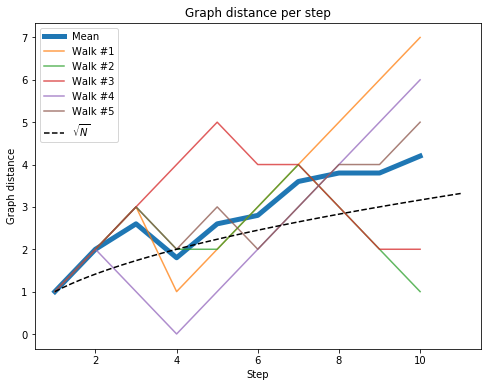

In [23]:
GRAPH_DISTANCES = np.array([
    [1, 2, 3, 1, 2, 3, 4, 5, 6, 7],
    [1, 2, 3, 2, 2, 3, 4, 3, 2, 1],
    [1, 2, 3, 4, 5, 4, 4, 3, 2, 2],
    [1, 2, 1, 0, 1, 2, 3, 4, 5, 6],
    [1, 2, 3, 2, 3, 2, 3, 4, 4, 5]
])

mean_grah_distance = np.mean(GRAPH_DISTANCES, 0)


fig = plt.figure(figsize=(8, 6))

x_steps = np.arange(1, GRAPH_DISTANCES.shape[1] + 1)

plt.plot(x_steps, mean_grah_distance, label='Mean', lw=5)

for i in range(GRAPH_DISTANCES.shape[0]):
    plt.plot(x_steps, GRAPH_DISTANCES[i,:], alpha=0.75, 
             label=f'Walk #{i + 1}')

smooth_x_steps = np.linspace(1, GRAPH_DISTANCES.shape[1] + 1)
plt.plot(smooth_x_steps, np.sqrt(smooth_x_steps), color='black',
         ls='--', label='$\\sqrt{N}$')


plt.xlabel('Step')
plt.ylabel('Graph distance')
plt.title('Graph distance per step')
plt.legend(loc='best')

plt.show()

## Question Answers:

#### _Compare your graph random walk with the 2d random walks we studied in class. For what types of graphs would you expect them to be similar? Do you expect that your walks should follow the same D~sqrt(N) behavior for distance traveled, or a different power law? Does the data from your walks support your hypothesis?_

In the 2-D random walks we studied, we generally assumed a move on each of the cardinal directions is equally likely, which is equivalent to a lattice graph of sorts, particularly one where each node is connected to the four nodes around it. The streets we walked on are connected more irregularly than that, with some side-streets allowing only particular turns and other multi-sided intersections, which break the regularity of the graph. Additionally, we walked without reversing, eliminating one of the legal moves at every decision points. While the data collected appears on average to be larger than $\sqrt{N}$, it is insufficiently little data to decide whether or not to support that hypothesis. If I had to guess, I would imagine that omitting reversal steps does cause a higher expected RMS than $\sqrt{N}$.

#### _In the 2d random walk we studied in class there was an emergent rotational symmetry. Do you think a similar symmetry will emerge for large numbers of steps in a typical city? Explain._

On expectation, I would say yes. More often than not, a city grid behaves regularly, and if the randomization is unbiased, there is no reason to prefer stepping in any particular direction over another. In fact, I believe that even without ever turning back, if the grid is sufficiently unbiased, the rotational symmetry would emerge. To test this, I would start by simulating data according to these rules, as it would be simpler than formally proving an expected rotational symmetry.

#### _Give an example of a process that happens in cities that might be modeled by this graph random walk model (besides the diffusion of Minerva NS162 students :) -- How might #statisticalemergence be relevant to studying this process?_

One interesting process that might be modeled by this sort of walk is the behavior of street animals, such as street cats. Unlike humans, who tend to be fairly goal-directed in most of their traversals of the street of their cities, cats might be governed by looking for food, which (locally) might appear to be a random search. Alternatively, it is known that cats are agents of the devil, and therefore might behave randomly just to freak us humans out. __#statisticalemergence__ would help with extracting macroscopic properties from this more micro behavior. For instance, if we perhaps know where these cats tend to sleep at night, and want to quantify what sort of areas we would expect to see them in the morning, we could use the coarse-grained approximation to estimate the radius we might see them cover. Given an estimate of the velocity, this would allow us to warn innocent people, and help them increase their likelihood of avoiding the feral beings.

#### _Give an example of a process in a different kind of system that could be modeled effectively by a graph random walk -- How might #statisticalemergence be relevant to studying this process?_

Another interesting case might be the spreading of a virus in a computer network. We can construct the connectivity graph of a network (say, the infrastructure of a large enterprise) by examining the different subnets and routers, and make some assumptions about which steps are more or less likely (perhaps this is not a perfectly uniform random walk). __#statisticalemergence__ would let us study interesting macro properties. For instance, we could mark which servers are most important to the functioning of the network, and see what their distance on the graph is from the average node -- this would clue us into how likely they are to get infected. We could also go the other way around - try to analyze (externally to the graph) which nodes are most likely to be infected (patient zero in our network), and try to understand how much damage a virus spreading from there might do and how far it could reach.

#### _A short description of one thing you noticed that you would have missed on your normal directed walks around town!_

I think the main thing was how much the default house and storefront change, as we traversed from Little Italy to Chinatown and around Washington Square Park. I knew these are distinct neighborhoods, but usually, I'm walking around them much faster, and didn't quite appreciate how different they feel one from the other. 


